<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Subsurface Data Analytics 

### Isotonic Regression for Subsurface Data Analytics in Python 


#### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)



### PGE 383 Exercise: Isotonic Regression for Subsurface Modeling in Python 

Here's a simple workflow, demonstration of isotonic regression for subsurface modeling workflows. This should help you get started with building subsurface models with data analytics and machine learning. Here's some basic details about isotonic regression. 

#### Isotonic Regression

Isotonic regression for prediction.  Here are some key aspects of linear regression:

**Stepwise Linear Parametric Model**

* the fit model is a piece-wise linear model at specific predictor feature isotonic constraints / thresholds under the constraint that $x_1 \ge ... \ge x_k$ where the resulting model must be monotonically increasing, $\hat{f}(x_1) \ge ... \ge \hat{f}(x_k)$.

* the loss function is: 

\begin{equation}
min \sum_{i=1}^{n} w_i (y_i - \hat{f}(x)_i)^2
\end{equation}

Subject to the constraint that:

\begin{equation}
\hat{f}(x_1) \ge ... \ge \hat{f}(x_n)
\end{equation}

**Assumptions**
* **Model Parameters** - parameterized by response at each isotonic constraint / threshold
* **Monotonic Increasing** - may not have a negative slope 
* **Piece-wise Linear Model** - assumes linear interpolation between each point

#### Workflow Goals

Learn the basics of isotonic regression in Python for analysis, modeling and prediction of porosity from density. This includes:

* Basic Python workflows and data preparation

* Training / fitting a ridge regression model

* Checking the model and learning about the impact of hyperparameters

#### Objective 

Content to support the PGE 383: Subsurface Machine Learning class.  

#### Getting Started

Here's the steps to get setup in Python with the GeostatsPy package:

1. Install Anaconda 3 on your machine (https://www.anaconda.com/download/). 
2. From Anaconda Navigator (within Anaconda3 group), go to the environment tab, click on base (root) green arrow and open a terminal. 
3. In the terminal type: pip install geostatspy. 
4. Open Jupyter and in the top block get started by copy and pasting the code block below from this Jupyter Notebook to start using the geostatspy functionality. 

There are examples below with these functions. You can go here to see a list of the available functions, https://git.io/fh4eX, other example workflows and source code. 

#### Import Required Packages

Let's import the GeostatsPy package.

In [90]:
import os                                                   # to set current working directory 
import numpy as np                                          # arrays and matrix math
import scipy.stats as st                                    # statistical methods
import pandas as pd                                         # DataFrames
import matplotlib.pyplot as plt                             # for plotting
from sklearn.isotonic import IsotonicRegression
from sklearn.model_selection import train_test_split        # train and test split
from sklearn.metrics import explained_variance_score

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time).  Also, in this case make sure to place the required (see below) data file in this working directory.  

In [7]:
os.chdir("d:\PGE383")                                       # set the working directory

#### Loading Data

Let's load the provided dataset. 'GrainSize_por.csv' is available at https://github.com/GeostatsGuy/GeoDataSets. It is a comma delimited file with 20 grain size ($mm$) and porosity (as a percentage) measures from the subsurface. We load the data file with the pandas 'read_csv' function into a data frame we called 'df'.  We preview each with the head function from Pandas DataFrames.

In [119]:
df = pd.read_csv("GrainSize_Por.csv")                    # read a .csv file in as a DataFrame
df

,Grainsize,Porosity
0,2.689284,5.400000
1,6.683638,10.647582
2,9.877106,7.926271
3,12.239344,11.278953
4,27.623312,10.508753
5,27.941670,14.960621
6,28.096457,10.619494
7,29.962596,11.896658
8,30.602685,12.479068
9,31.788502,16.865819


#### Test and Train Split

Let's separate the data into test and train and visualize it.

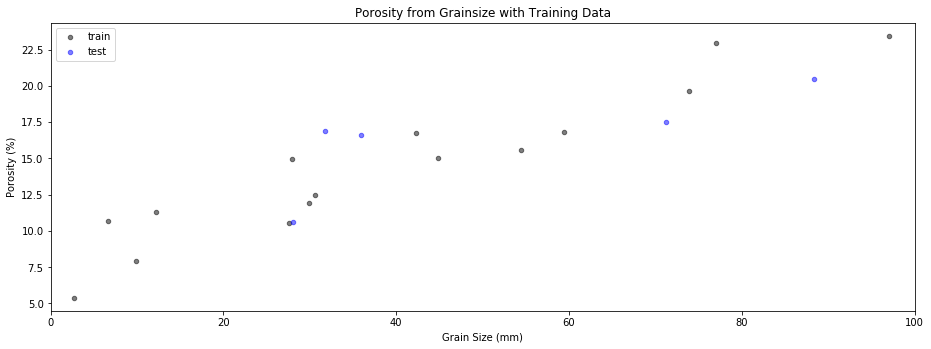

In [121]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0], df.iloc[:,1], test_size=0.25, random_state=73073)
plt.subplot(111)
plt.scatter(X_train, y_train,  color='black', s = 20, alpha = 0.5, label='train')
plt.scatter(X_test, y_test,  color='blue', s = 20, alpha = 0.5, label='test')
plt.title('Porosity from Grainsize with Training Data'); plt.xlabel('Grain Size (mm)'); plt.ylabel('Porosity (%)')
plt.xlim(0,100)#; plt.ylim(0,1500000)
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.legend()
plt.show()

The data is generally monotonic increasing with noise. The training and testing split looks reasonable.

Let's assign the isotonic constraints / thresholds and visualize them.

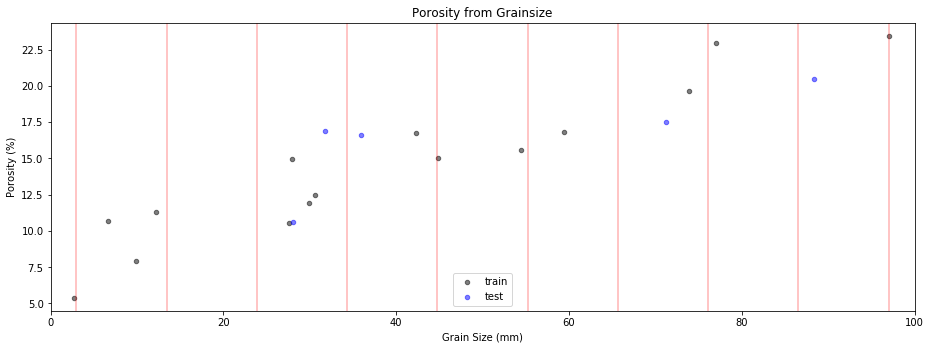

In [124]:
X_predict = np.linspace(3,97,10)
plt.subplot(111)
plt.scatter(X_train, y_train,  color='black', s = 20, alpha = 0.5, label='train')
plt.scatter(X_test, y_test,  color='blue', s = 20, alpha = 0.5, label='test')
for threshold in X_predict:
    plt.axvline(threshold, color='red', alpha = 0.3)
plt.title('Porosity from Grainsize'); plt.xlabel('Grain Size (mm)'); plt.ylabel('Porosity (%)')
plt.xlim(0,100)#; plt.ylim(0,1500000)
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.legend()
plt.show()

#### Fit the Model

Let's fit the model with these isotonic constraints / thresholds.

In [125]:
iso_reg = IsotonicRegression().fit(X_train, y_train)
y_predict = iso_reg.predict(X_predict)

We can visualize the model parameters, the $f(x_1),...,f(x_k)$ estimates at the thresholds.

In [126]:
y_predict

array([ 5.70235972, 10.8938532 , 10.8938532 , 13.96711794, 15.78074761,
       15.92869652, 18.01935975, 22.04437137, 23.19726737, 23.43066308])

Now we can visualize the model with a regular line plot over the model parameters.

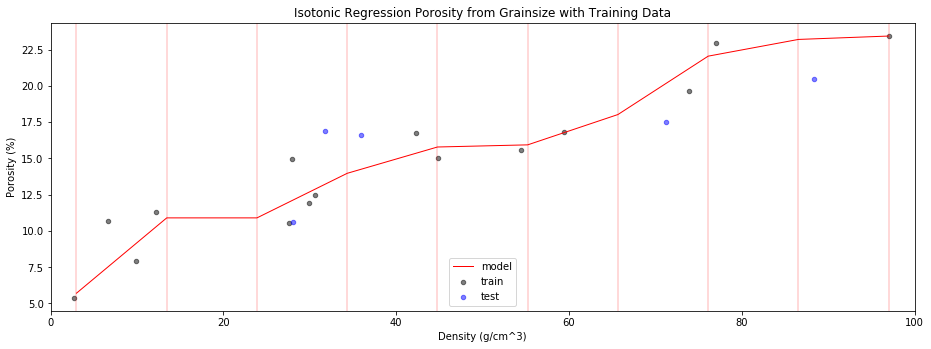

In [127]:
# Plot model fit
plt.subplot(111)
plt.scatter(X_train, y_train,  color='black', s = 20, alpha = 0.5, label='train')
plt.scatter(X_test, y_test,  color='blue', s = 20, alpha = 0.5, label='test')
plt.plot(X_predict,y_predict, color='red', linewidth=1, label='model')
for threshold in X_predict:
    plt.axvline(threshold, color='red', alpha = 0.2)
plt.title('Isotonic Regression Porosity from Grainsize with Training Data'); plt.xlabel('Density (g/cm^3)'); plt.ylabel('Porosity (%)')
plt.xlim(0,100)#; plt.ylim(0,1500000)
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.legend()
plt.show()

#### Make Predictions and Check the Model Goodness

Now let's make predictions at the testing data locations and check the model goodness

* let's use the variance explained

We will plot the estimates for the training data as 'predicted test'

* note the iso_reg.transform() function does not seem to work properly

* we will just use a linear interpolation function from numpy to make estimates of the response feature with the model at new predictor feature values

Variance Explained = 0.303


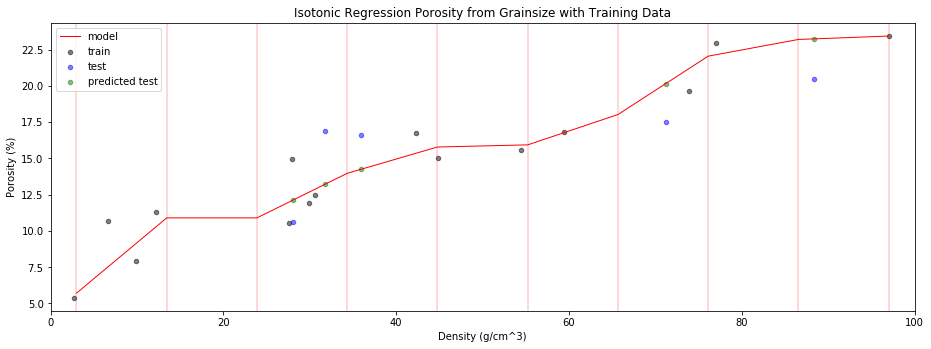

In [129]:
# The transform function should calculate the result for new observations, but doesn't seem to work
# let's just use piece-wise linear interpolation from NumPy.
#y_predict_test = iso_reg.transform(X_test)
y_predict_test = np.interp(X_test, X_predict, y_predict, left=None, right=None, period=None)
r2 = explained_variance_score(y_test,y_predict_test)
print('Variance Explained = ' + str(round(r2,3)))

# Plot test predictions
plt.subplot(111)
plt.scatter(X_train, y_train,  color='black', s = 20, alpha = 0.5, label='train')
plt.scatter(X_test, y_test,  color='blue', s = 20, alpha = 0.5, label='test')
plt.scatter(X_test, y_predict_test,  color='green', s = 20, alpha = 0.5, label='predicted test')
plt.plot(X_predict,y_predict, color='red', linewidth=1, label='model')
for threshold in X_predict:
    plt.axvline(threshold, color='red', alpha = 0.2)
plt.title('Isotonic Regression Porosity from Grainsize with Training Data'); plt.xlabel('Density (g/cm^3)'); plt.ylabel('Porosity (%)')
plt.xlim(0,100)#; plt.ylim(0,1500000)
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.legend()
plt.show()

Here's another model with very few isotonic constraints.

Variance Explained = 0.134


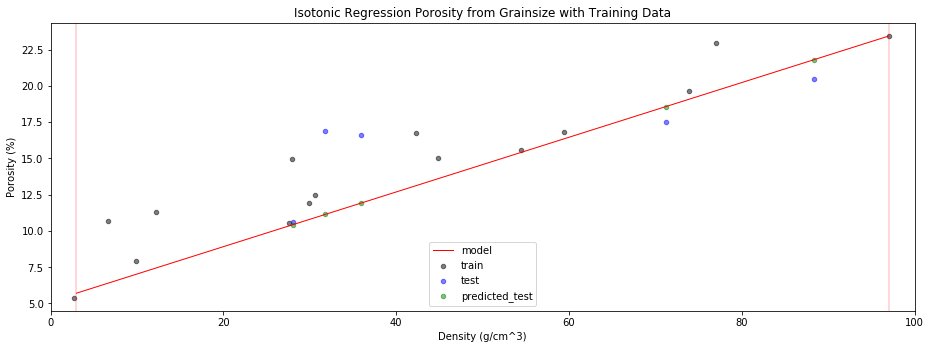

In [130]:
# Let's try varying the number of isotonic constraints, thresholds
X_predict = np.linspace(3,97,2)
iso_reg = IsotonicRegression().fit(X_train, y_train)
y_predict = iso_reg.predict(X_predict)

# Make predictions at testing data locations and calculate the model goodness
y_predict_test = np.interp(X_test, X_predict, y_predict, left=None, right=None, period=None)
r2 = explained_variance_score(y_test,y_predict_test)
print('Variance Explained = ' + str(round(r2,3)))

# Plot test predictions
plt.subplot(111)
plt.scatter(X_train, y_train,  color='black', s = 20, alpha = 0.5, label='train')
plt.scatter(X_test, y_test,  color='blue', s = 20, alpha = 0.5, label='test')
plt.scatter(X_test, y_predict_test,  color='green', s = 20, alpha = 0.5, label='predicted_test')
plt.plot(X_predict,y_predict, color='red', linewidth=1, label='model')
for threshold in X_predict:
    plt.axvline(threshold, color='red', alpha = 0.2)
plt.title('Isotonic Regression Porosity from Grainsize with Training Data'); plt.xlabel('Density (g/cm^3)'); plt.ylabel('Porosity (%)')
plt.xlim(0,100)#; plt.ylim(0,1500000)
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.legend()
plt.show()

Now let's run multiple models with variable number of isotonic constraints to perform a rough hyperparameter tuning.

* simple test and train split. cross validation

* model goodness by variance explained

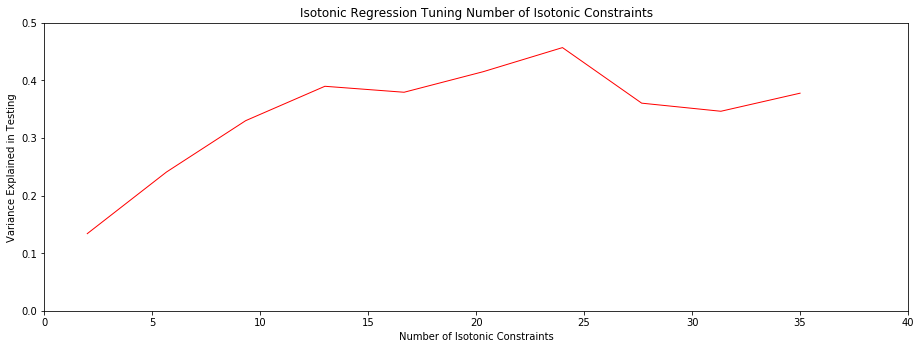

In [118]:

isotonic_constraint_list = np.linspace(2,35,10)
r2 = []

for k in isotonic_constraint_list:
    X_predict = np.linspace(3,97,k)
    iso_reg = IsotonicRegression().fit(X_train, y_train)
    y_predict = iso_reg.predict(X_predict)
    y_predict_test = np.interp(X_test, X_predict, y_predict, left=None, right=None, period=None)
    r2.append(explained_variance_score(y_test,y_predict_test))

plt.subplot(111)
plt.plot(isotonic_constraint_list, r2, color='red', linewidth=1, label='model')
plt.title('Isotonic Regression Tuning Number of Isotonic Constraints'); plt.xlabel('Number of Isotonic Constraints'); plt.ylabel('Variance Explained in Testing')
plt.xlim(0,40); plt.ylim(0,0.5)
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)

#### Comments

Isotonic regression provides a simple, piece-wise linear model with specified isotonic and monotonic constraint. The hyperparameter is the number of isotonic constraints. I hope this was helpful,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin
On twitter I'm the @GeostatsGuy.


***

#### More on Michael Pyrcz and the Texas Center for Geostatistics:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)
